In [3]:
import os.path as osp
import sys
path = osp.dirname(osp.abspath(''))
sys.path.append(path)
sys.path.append(osp.join(path, "open_biomed"))
path

'/mnt/luoyz_dair/OpenBioMed'

In [12]:
# load data processor
import json
from open_biomed.utils.data_utils import DataProcessorFast
from open_biomed.utils import fix_path_in_config
from open_biomed.models.task_model.text2smi_model import Text2SMILESModel

config = json.load(open("../configs/text2smi/molt5.json", "r"))
fix_path_in_config(config, path)
print("Config: ", config)
processor = DataProcessorFast(entity_type="text", config=config["data"]["text"])

# load model
model = Text2SMILESModel(config["network"]).to("cuda:0")
model = model.eval()


Config:  {'model': 'MolT5', 'data': {'mol': {'modality': ['structure'], 'featurizer': {'structure': {'name': 'transformer', 'transformer_type': 't5', 'model_name_or_path': '/mnt/luoyz_dair/OpenBioMed/ckpts/text_ckpts/MolT5-base-caption2smiles', 'max_length': 512}}}, 'text': {'name': 'TransformerTokenizer', 'transformer_type': 't5', 'max_length': 512, 'model_name_or_path': '/mnt/luoyz_dair/OpenBioMed/ckpts/text_ckpts/MolT5-base-caption2smiles'}}, 'network': {'structure': {'name': 'molt5', 'model_name_or_path': '/mnt/luoyz_dair/OpenBioMed/ckpts/text_ckpts/MolT5-base-caption2smiles', 'transformer_type': 't5', 'stop_grad': True}}}


(17Z)-3,11-dioxopregna-4,17(20)-dien-21-oic acid methyl ester is a steroid ester that is methyl (17E)-pregna-4,17-dien-21-oate substituted by oxo groups at positions 3 and 11. It is a 3-oxo-Delta(4) steroid, an 11-oxo steroid, a steroid ester and a methyl ester. It derives from a hydride of a pregnane.
Generated molecule:
CC(=O)OC1=CC=C(C=C1)[C@H]2CC[C@@H]3[C@@]2(CCC[C@@]4([C@H]3CC[C@@H]4C(=O)OC)C)C


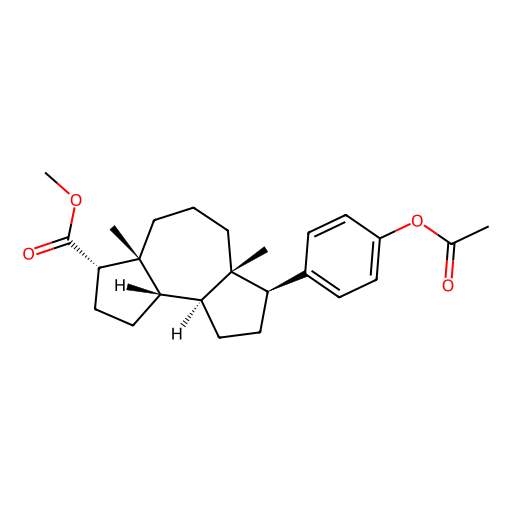

In [19]:
import torch
from rdkit import Chem
from rdkit.Chem import Draw

input_text = "(17Z)-3,11-dioxopregna-4,17(20)-dien-21-oic acid methyl ester is a steroid ester that is methyl (17E)-pregna-4,17-dien-21-oate substituted by oxo groups at positions 3 and 11. It is a 3-oxo-Delta(4) steroid, an 11-oxo steroid, a steroid ester and a methyl ester. It derives from a hydride of a pregnane."
print(input_text)
input = processor(input_text).to("cuda:0")
with torch.no_grad():
    smiles = model.decode_mol(input, num_beams=5, max_length=512)[0]
print("Generated molecule:")
smiles = "".join(model.decoder_tokenizer.batch_decode(smiles, skip_special_tokens=True)[1:-1])
print(smiles)
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(smiles)], 
    molsPerRow=1, 
    subImgSize=(512, 512)
)